# Visualising Geographic Data

Latitude and longitude points on two-dimensional maps describe points on a sphere, to plot the values on a two-dimensional plane, we need to project these points on a map: convert the latitude and longitude into Cartesian coordinates.

From http://dataquest.io:" When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs here. We'll use the Mercator projection, because it is commonly used by popular mapping software."

In [2]:
def mount_google_drive(force_remount=True):
  from google.colab import drive
  print('drive_filepath="drive/My Drive/"')
  return drive.mount('/content/drive', force_remount=force_remount)

mount_google_drive()

drive_filepath="drive/My Drive/"
Mounted at /content/drive


In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

The datasets come from the openflights website: https://openflights.org/data.html (`.dat` files)

Overview of most important columns in the following files:
* airlines.csv - data on each airline.

    * country - where the airline is headquartered.
    * active - if the airline is still active.
* airports.csv - data on each airport.

    * name - name of the airport.
    * city - city the airport is located.
    * country - country the airport is located.
    * code - unique airport code.
    * latitude - latitude value.
    * longitude - longitude value.
* routes.csv - data on each flight route.

    * airline - airline for the route.
    * source - starting city for the route.
    * dest - destination city for the route.


In [51]:
import pandas as pd
airlines = pd.read_csv('drive/My Drive/airlines.csv')
airports = pd.read_csv('drive/My Drive/airports.csv')
routes = pd.read_csv('drive/My Drive/routes.csv')
geo_routes = pd.read_csv('drive/My Drive/geo_routes.csv')

print(airports[airports['city']=='London'])

      id      name    city         country code  icao   latitude  longitude  \
172  174    London  London          Canada  YXU  CYXU  43.033056 -81.151111   
488  492     Luton  London  United Kingdom  LTN  EGGW  51.874722  -0.368333   
498  502   Gatwick  London  United Kingdom  LGW  EGKK  51.148056  -0.190278   
499  503      City  London  United Kingdom  LCY  EGLC  51.505278   0.055278   
503  507  Heathrow  London  United Kingdom  LHR  EGLL  51.477500  -0.461389   
543  548  Stansted  London  United Kingdom  STN  EGSS  51.885000   0.235000   

     altitude  offset dst         timezone  
172     912.0    -5.0   A  America/Toronto  
488     526.0     0.0   E    Europe/London  
498     202.0     0.0   E    Europe/London  
499      19.0     0.0   E    Europe/London  
503      83.0     0.0   E    Europe/London  
543     348.0     0.0   E    Europe/London  


## Basemap

Basemap is an extension to Matplotlib that makes it easier to work with geographic data.

Installing basemap (with Anaconda), last version to overcome the deprecated warning about the `ishold()` and `hold` methods:

`conda install -c conda-forge basemap`

To create a new instance of the basemap class, we call the basemap constructor assigning the following parameters:

* projection: the map projection.
* llcrnrlat: **lat**itude of **l**ower **l**eft hand **c**o**rn**e**r** of the desired map domain
* urcrnrlat: **lat**itude of **u**ppe**r** right hand **c**o**rn**e**r** of the desired map domain
* llcrnrlon: **lon**gitude of **l**ower **l**eft hand **c**o**rn**e**r** of the desired map domain
* urcrnrlon: **lon**gitude of **u**ppe**r** right hand **c**o**rn**e**r** of the desired map domain

As an example, let's visualise the locations of airports from our data set:

In [7]:
!pip install Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 103.9 MB/s eta 0:00:00


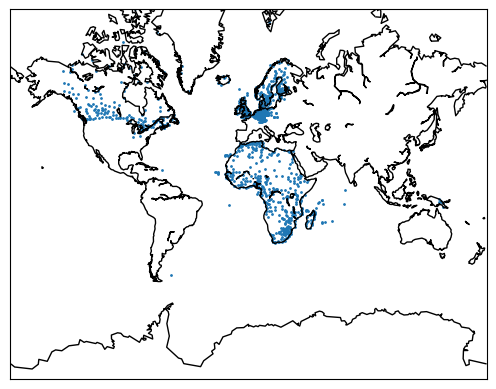

In [55]:
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)
m.drawcoastlines()
m.scatter(x,y,s=1)
plt.show()

The file, geo_routes.csv, contains the latitude and longitude values corresponding to the source and destination airports for each route. From http://dataquest.io: "To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. While the routes dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (airports)."

In [9]:
print(geo_routes.info())
print(geo_routes.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airline    1562 non-null   object 
 1   source     1562 non-null   object 
 2   dest       1562 non-null   object 
 3   equipment  1562 non-null   object 
 4   start_lon  1562 non-null   float64
 5   end_lon    1562 non-null   float64
 6   start_lat  1561 non-null   float64
 7   end_lat    1561 non-null   float64
dtypes: float64(4), object(4)
memory usage: 97.8+ KB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  5

`basemap.drawgreatcircle()` method isn't able to create great circles properly when they go outside of the map boundaries.

Let us visualise the flights from the Konrad-Adenauer airport in Bonn ('CGN'):

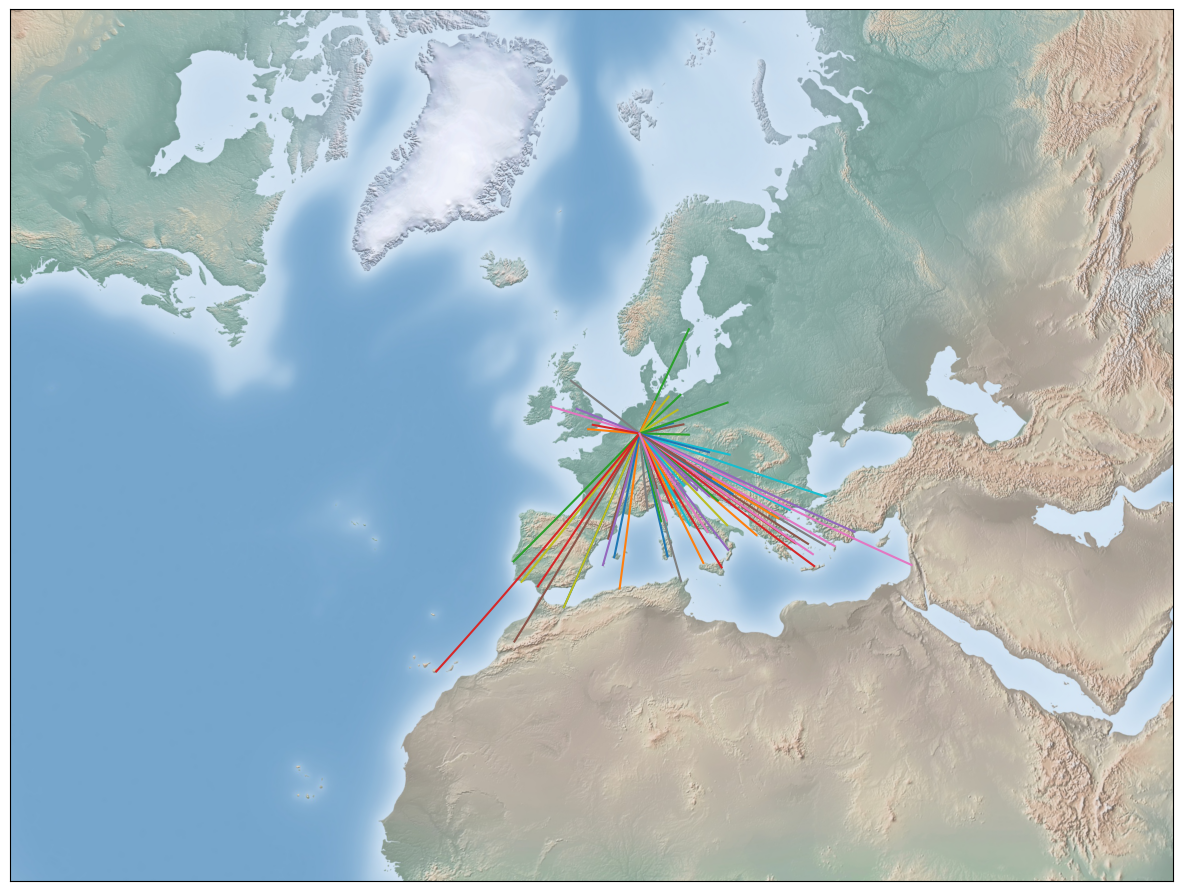

In [54]:
def create_great_circles(df):

    # m.drawmapboundary(fill_color='aqua')
    # m.fillcontinents(color='coral',lake_color='aqua')
    # m.drawcoastlines()
    m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=0.)
    m.shadedrelief()


    # m = Basemap(projection='lcc', resolution=None,
    #        width=8E6, height=8E6,
    #        lat_0=-10, lon_0=0,)
    # m.etopo(scale=0.5, alpha=0.5)
    for index, row in df.iterrows():
        start_lat = row['start_lat']
        end_lat = row['end_lat']
        end_lon = row['end_lon']
        start_lon = row['start_lon']
        if end_lat<180 and start_lat<180 and (end_lon-start_lon)<180:
            m.drawgreatcircle(start_lon,start_lat,end_lon, end_lat)

dfw = geo_routes[geo_routes['source']=='CGN']
#print(geo_routes['source'].value_counts())
fig, ax = plt.subplots(figsize=(15,20))

create_great_circles(dfw)

plt.show()